## ***Name : `Fawad Ali Shaikh`***
## ***Task 3 : `Heart Disease Prediction`***
## ***Linkedin : [Fawad Ali](https://www.linkedin.com/in/fawad-ali5)***

In [2]:
!pip install kaggle -q

In [3]:
from google.colab import files

# 1. Upload the file
print("Please select the 'kaggle.json' file to upload:")
files.upload()

# 2. Move the file and set permissions
# This creates the .kaggle folder and moves the file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# This command changes the file permissions to be read/write only by the user
! chmod 600 ~/.kaggle/kaggle.json

print("\nAuthentication successful!")

Please select the 'kaggle.json' file to upload:


Saving kaggle.json to kaggle.json

Authentication successful!


In [4]:
#!/bin/bash
!kaggle datasets download redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 38.1MB/s]


In [5]:
import zipfile
import os

# 1. Define the name of the zip file (adjust this to your dataset name)
# The ZIP file name is usually the dataset_name part of the command.
zip_file_name = 'heart-disease-data.zip'

# 2. Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.') # Extracts all files to the current directory

# 3. Clean up the zip file (optional)
os.remove(zip_file_name)

print(f"\nFiles extracted. Check the file browser on the left for your data!")


Files extracted. Check the file browser on the left for your data!


## ***Import Libraries***

In [6]:
# to handle data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# to preprocess data

from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning tasks
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ignore warnings

import warnings
warnings.filterwarnings('ignore')




## ***Load the Dataset***

In [7]:
# Load dataset

df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
# Shape of data

df.shape

(920, 16)

- ***So, we have `920` rows and `16` columns***

In [9]:
# Information about data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


- ***So, it contains both `numerical` and `categorical` datatypes***

In [10]:
# Columns in the dataset

df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False))

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64


- ***So, we have `null values`***

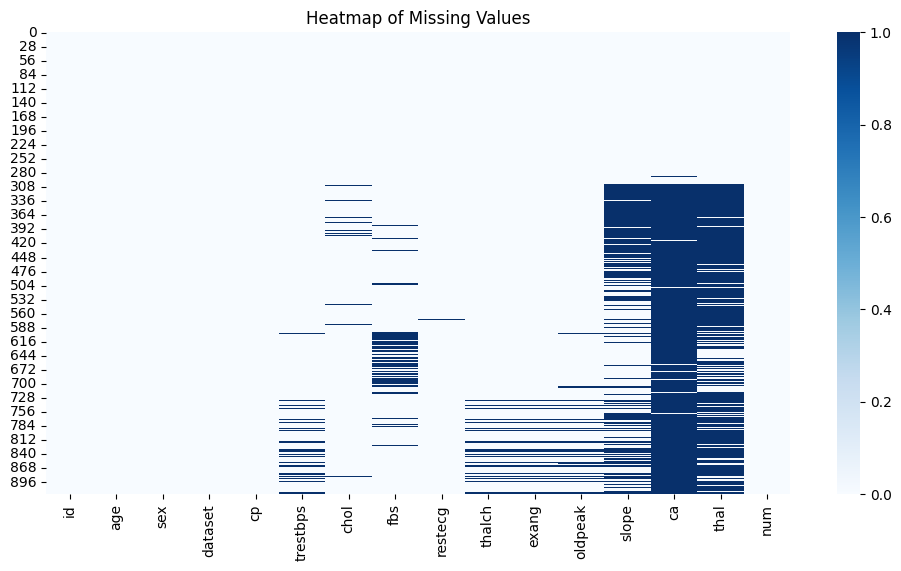

In [12]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

In [13]:
# Check Dupliate Values

print(f'So we have duplicate values in dataset \n{df.duplicated().sum()}')

So we have duplicate values in dataset 
0


### ***Impute Missing Values***

In [14]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64


In [15]:
# split data into numerical & categorical columns

num_cols = [col for col in df.columns if df[col].dtype!='O']
cat_cols = [col for col in df.columns if col not in num_cols]


In [16]:
# impute missing values in numeric columns using iterative imputer

df[num_cols] = IterativeImputer().fit_transform(df[num_cols])

# check null values

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
sex          0.000000
age          0.000000
chol         0.000000
trestbps     0.000000
cp           0.000000
dataset      0.000000
oldpeak      0.000000
thalch       0.000000
ca           0.000000
num          0.000000
dtype: float64


***So, we impute all missing values in `numerical` columns***

In [17]:
# Impute categorical columns using Random Forest Classifier

for col in cat_cols:
    # Separate data into known and unknown values for the current column
    known_data = df[df[col].notna()]
    unknown_data = df[df[col].isna()]

    # Check if there are any unknown values to impute
    if unknown_data.shape[0] > 0:  # Proceed only if there are unknown values
        # Define features and target for the Random Forest model
        # Exclude categorical features from X_known
        X_known = known_data.drop(columns=[col] + cat_cols)  # Exclude all cat_cols
        y_known = known_data[col]
        X_unknown = unknown_data.drop(columns=[col] + cat_cols) # Exclude all cat_cols

        # Create and fit LabelEncoder for the target variable
        encoder = LabelEncoder()
        y_known_encoded = encoder.fit_transform(y_known)

        # Create and train a Random Forest classifier
        model = RandomForestClassifier()
        model.fit(X_known, y_known_encoded)

        # Predict missing values and impute them in the DataFrame
        imputed_values = model.predict(X_unknown)
        imputed_values = encoder.inverse_transform(imputed_values)  # Inverse transform to get original labels
        df.loc[df[col].isna(), col] = imputed_values



In [18]:
# check null values

print(df.isnull().sum().sort_values(ascending=False))


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


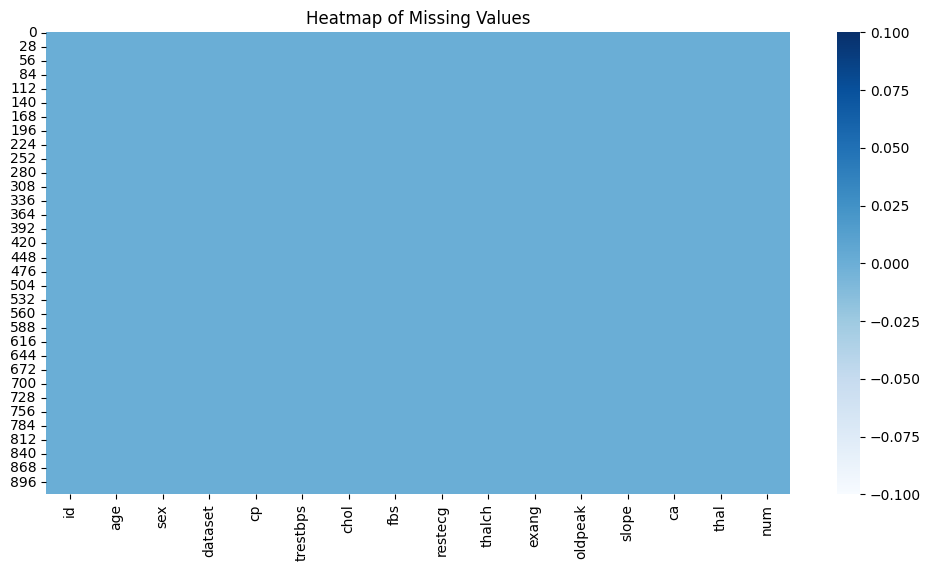

In [19]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

***So we have 0 null values in the dataset***



## ***Let's Deal with Outliers***

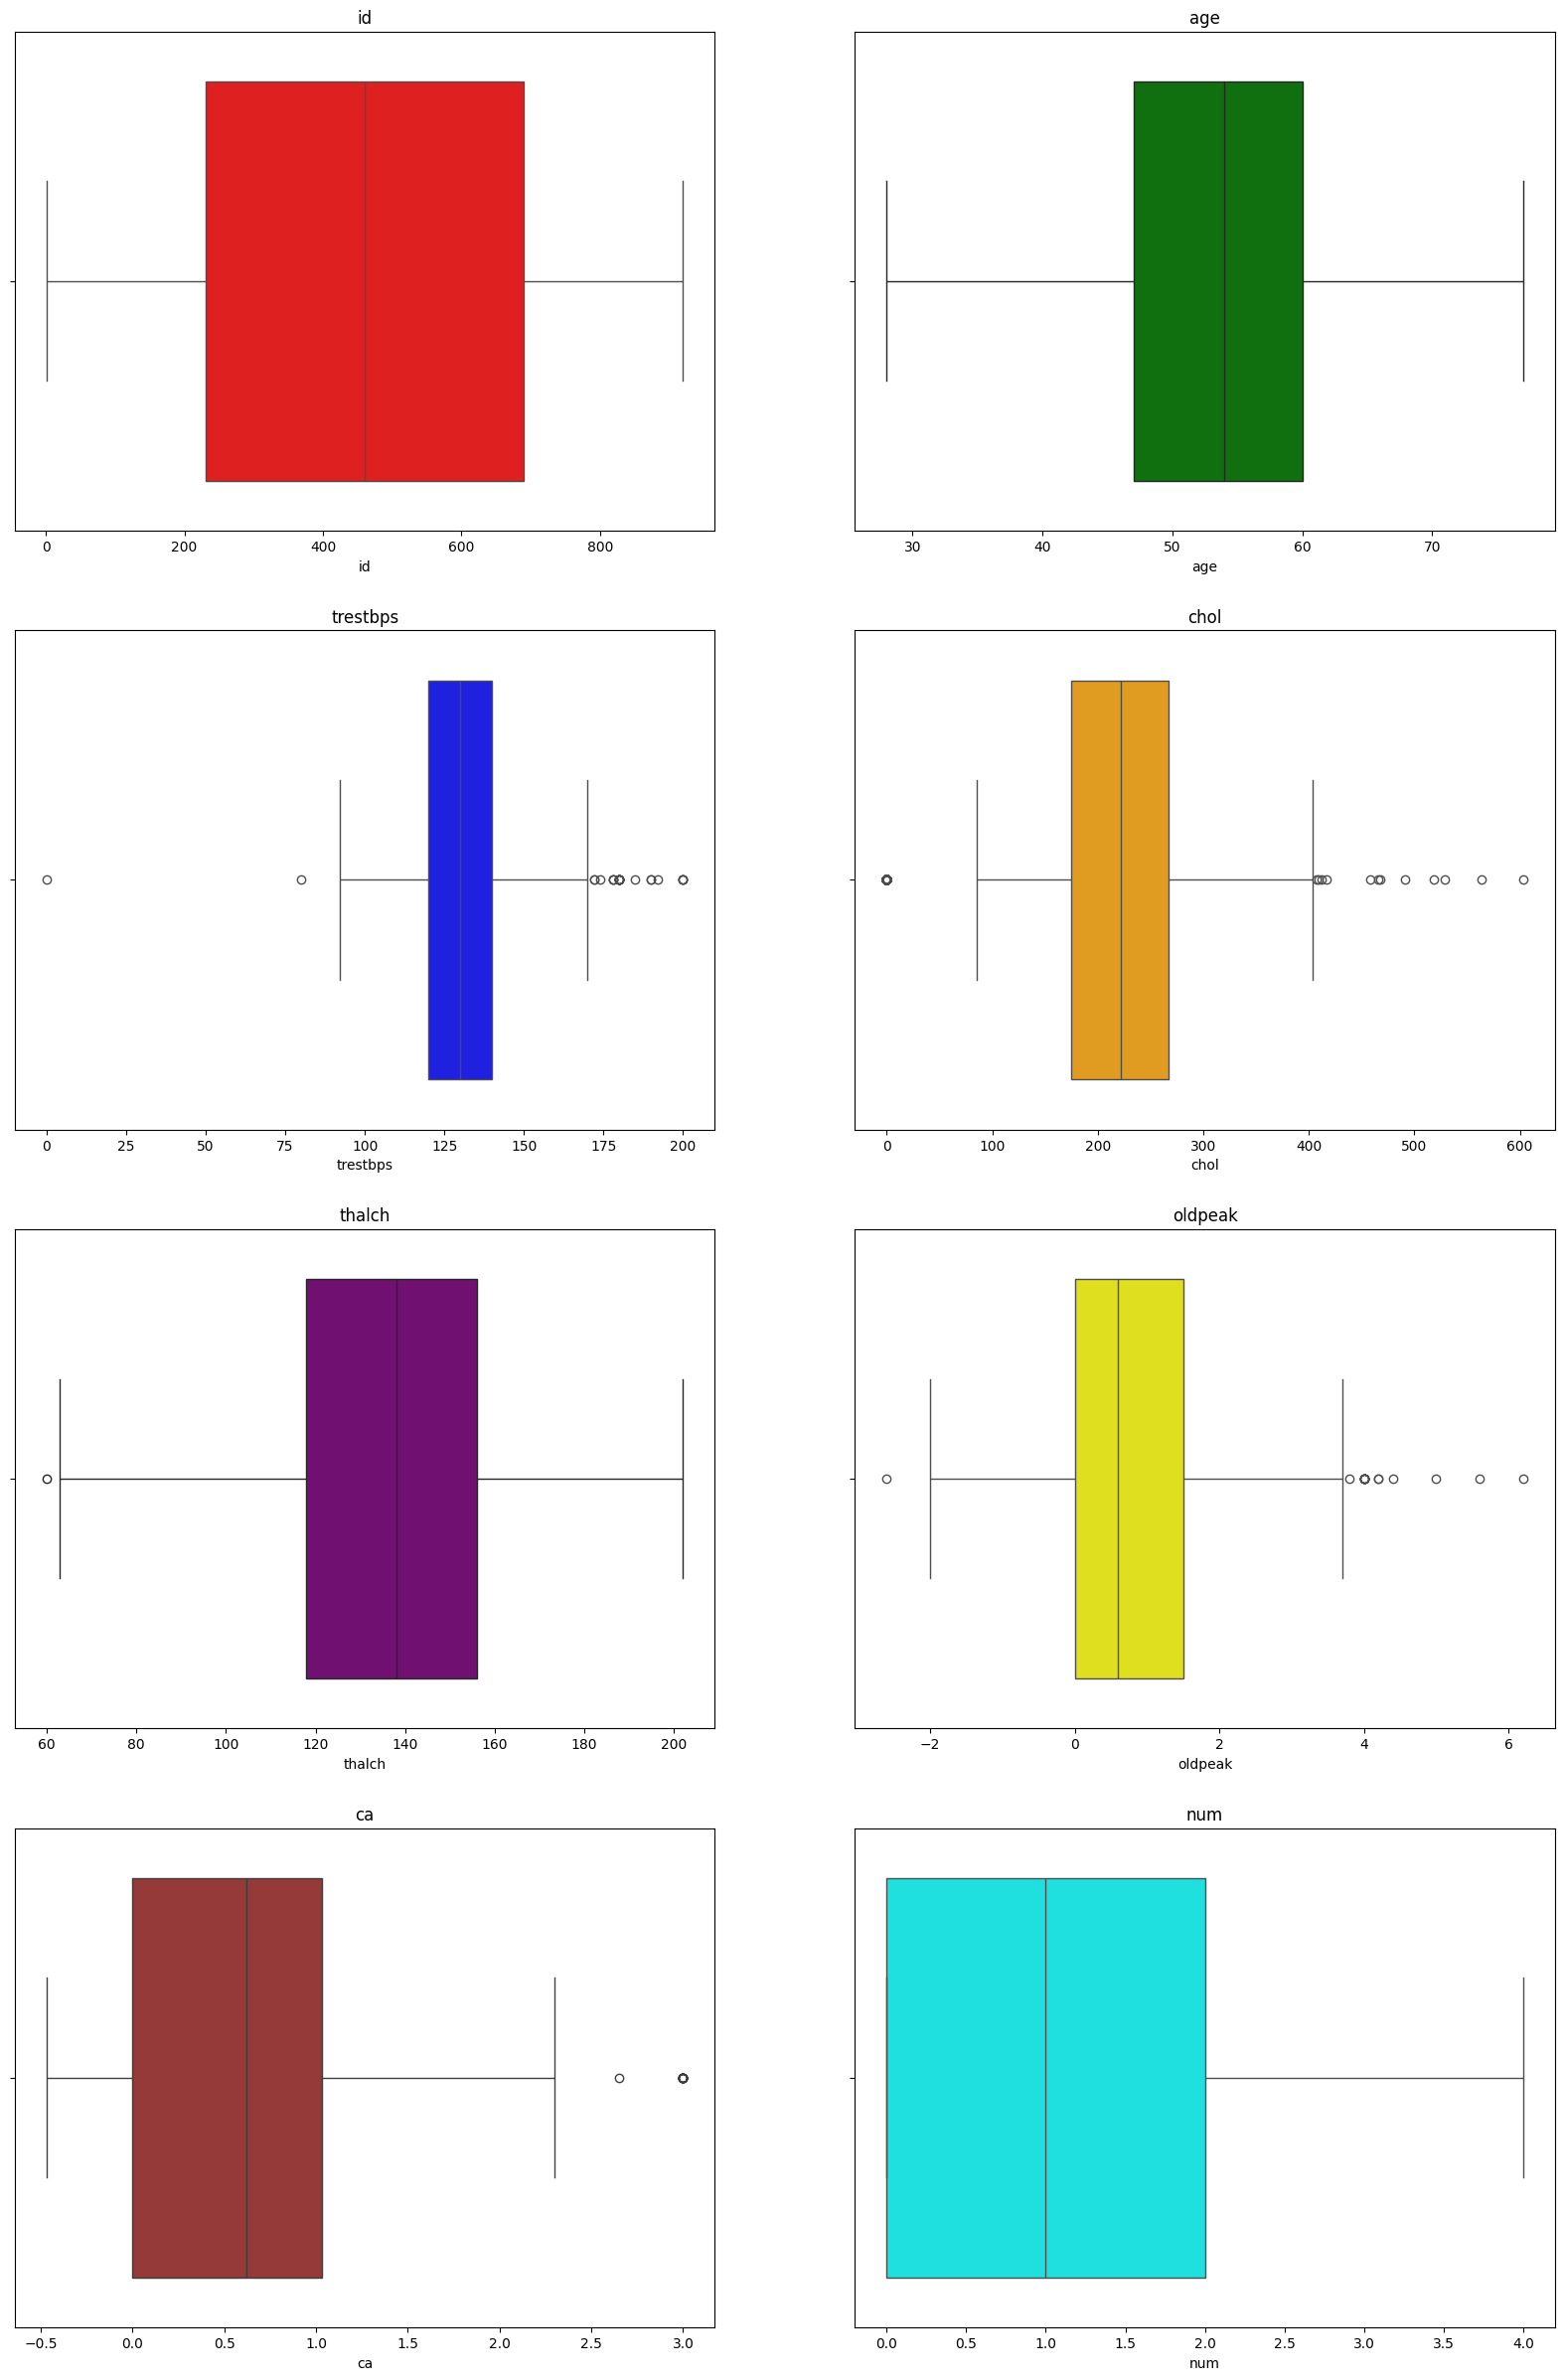

In [20]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=df[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

- ***Here is a `weired` thing in `trestbps` column that it shows the `blood pressure`is `0` which is not `true`***

In [21]:
# row where trestbps is 0

df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754.0,55.0,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,1.910889,reversable defect,3.0


In [22]:
# remove row where trestbps is 0

df.drop(df[df['trestbps']==0].index,inplace=True)

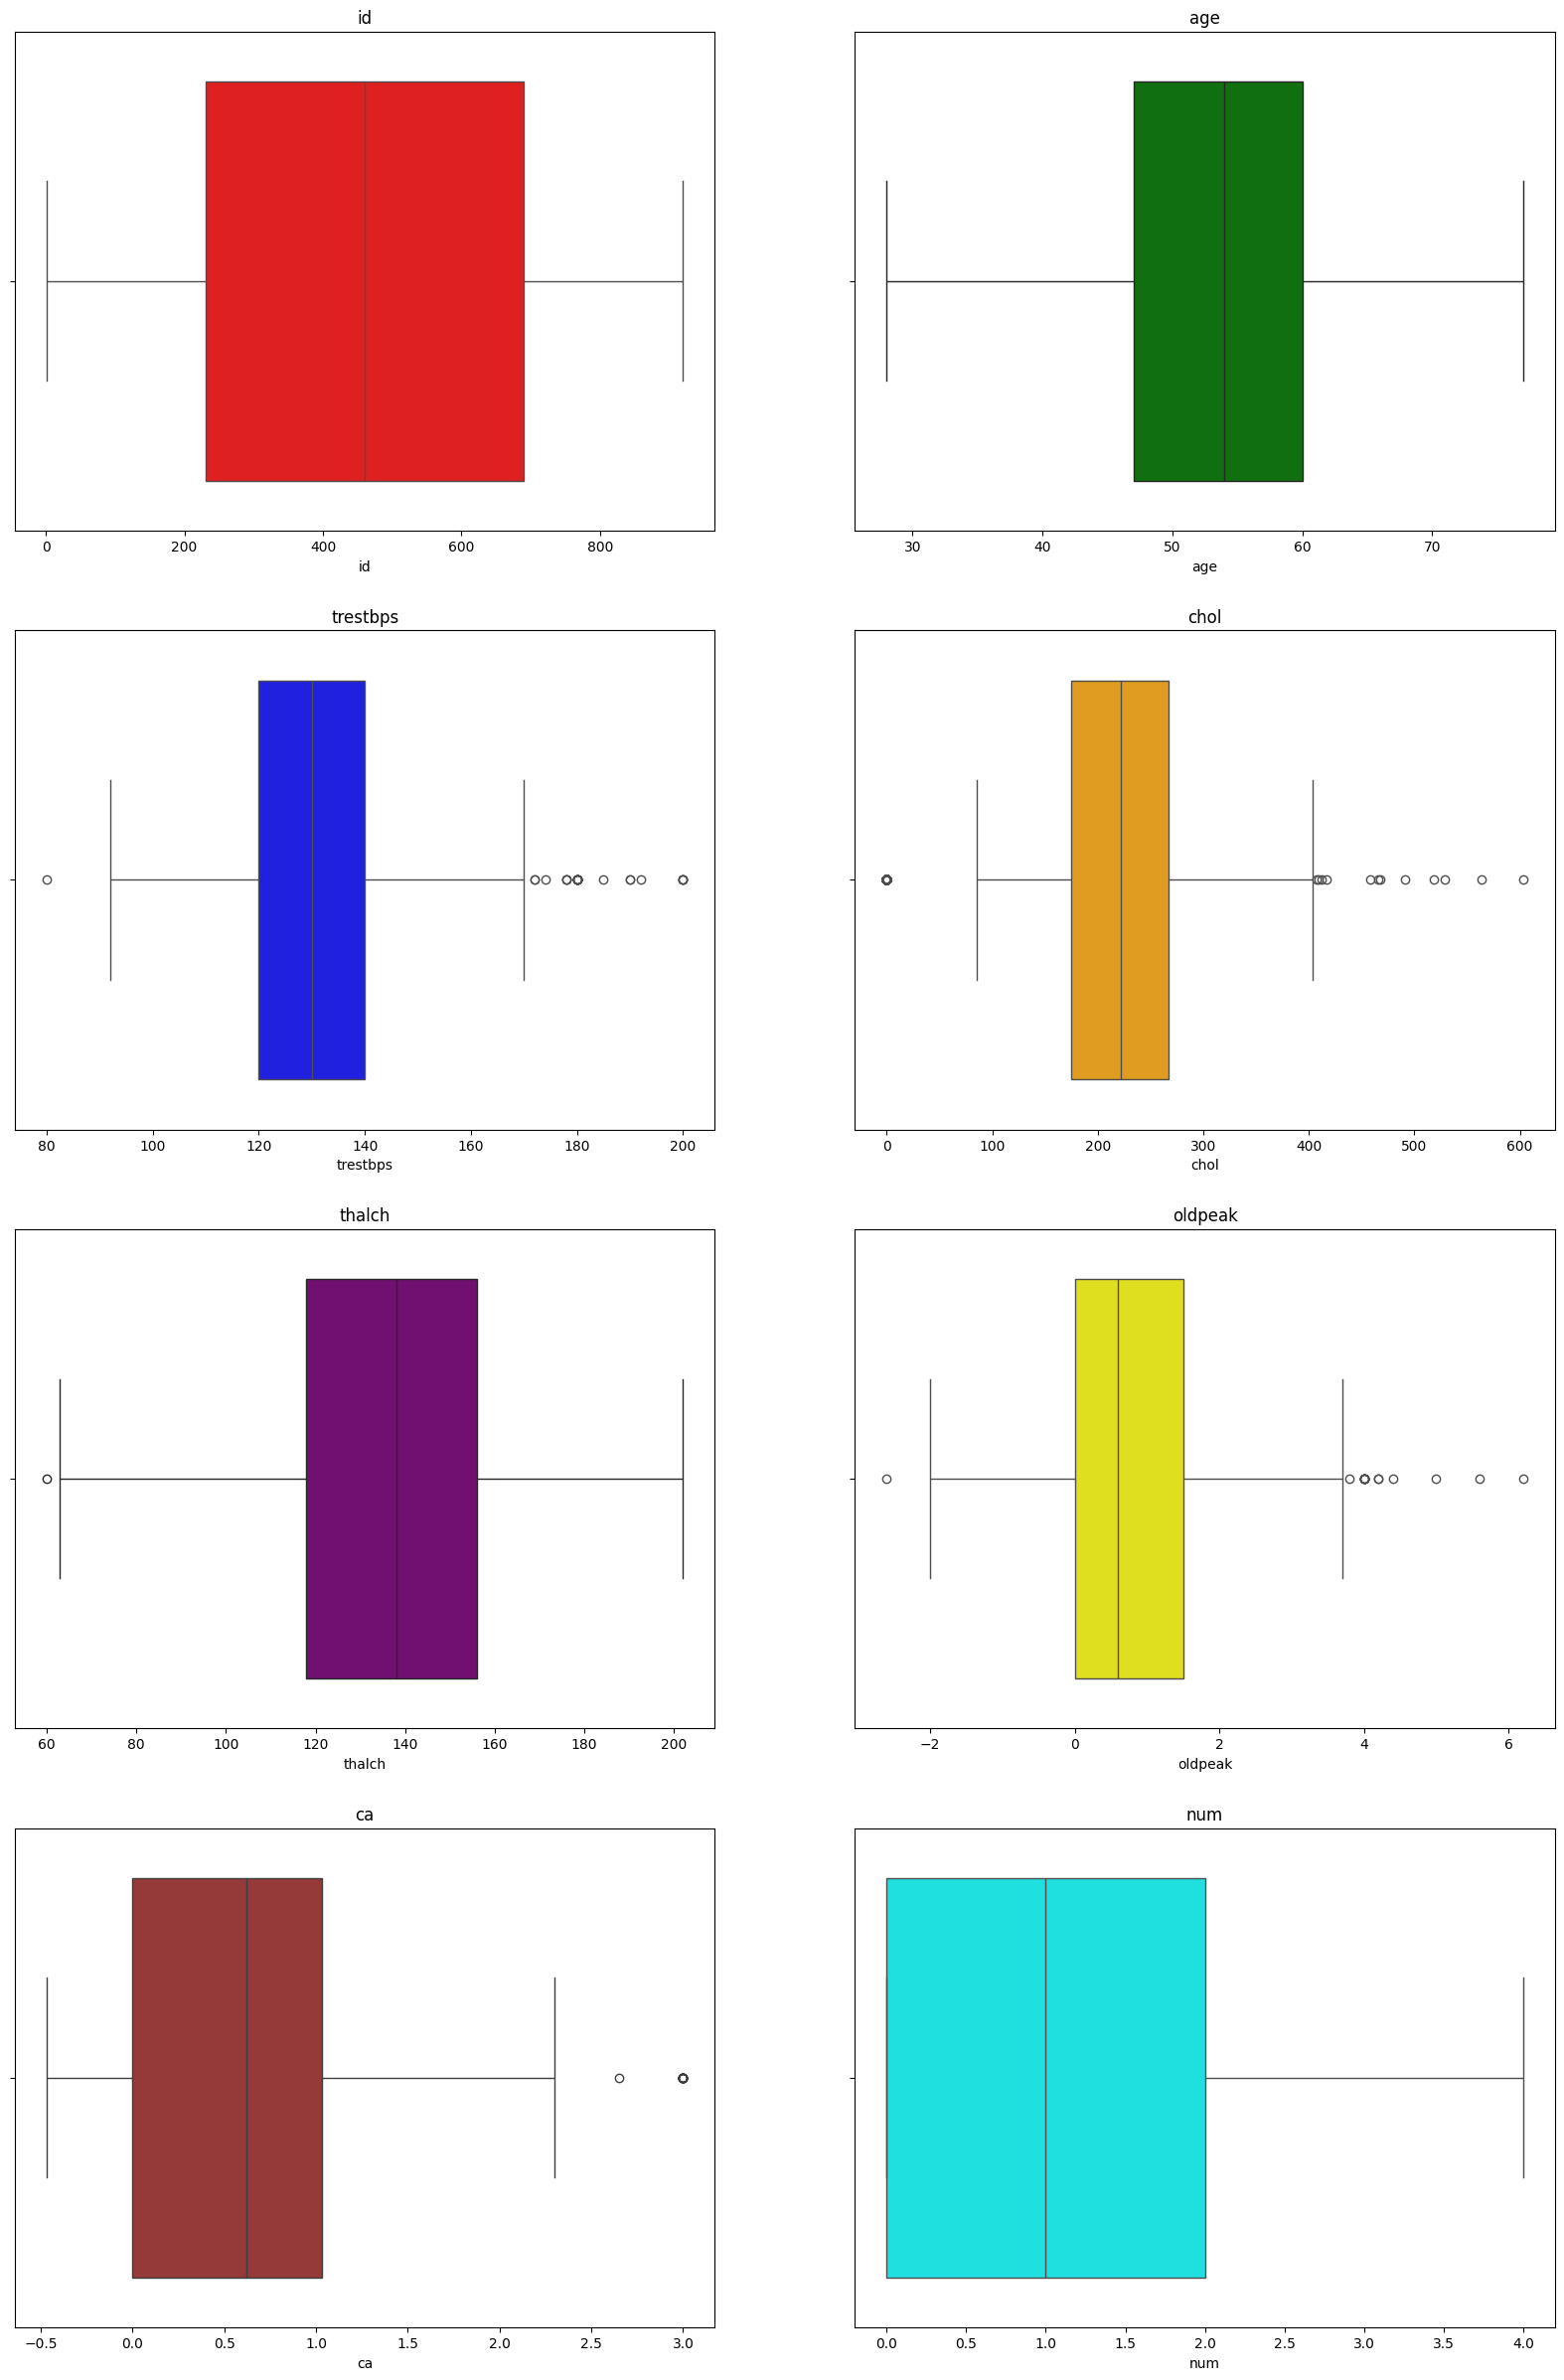

In [23]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=df[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

- ***So, we successfully remove one outlier from our perception***

## ***EDA***

In [24]:
# Summmary of all neumeric columns
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.550495,199.010658,136.346843,0.890296,0.719389,0.993471
std,265.693391,9.429689,18.003627,109.015820,25.658885,1.066356,0.714032,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,-0.467855,0.000000
25%,230.500000,47.000000,120.000000,175.009775,118.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,222.000000,138.000000,0.600000,0.620961,1.000000
75%,689.500000,60.000000,140.000000,267.000000,156.000000,1.500000,1.030788,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### ***Explore data based on Sex & Age***

In [25]:
# Explore age column

df['age'].describe()

,age
count,919.000000
mean,53.509249
std,9.429689
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


*  ***Maximum age is 77***
*   ***Minimum age is 28***
* ***Mean is 53***





In [26]:
print(df['age'].value_counts().sort_values(ascending=False))

age
54.0    51
58.0    43
55.0    40
56.0    38
57.0    38
52.0    36
59.0    35
51.0    35
62.0    35
53.0    33
60.0    32
61.0    31
48.0    31
63.0    30
50.0    25
41.0    24
43.0    24
46.0    24
49.0    22
64.0    22
65.0    21
44.0    19
47.0    19
42.0    18
45.0    18
38.0    16
67.0    15
39.0    15
40.0    13
66.0    13
69.0    13
37.0    11
35.0    11
68.0    10
74.0     7
34.0     7
70.0     7
36.0     6
71.0     5
32.0     5
72.0     4
29.0     3
75.0     3
31.0     2
77.0     2
76.0     2
33.0     2
28.0     1
30.0     1
73.0     1
Name: count, dtype: int64


Mean 53.50924918389554
Median 54.0
Mode 0    54.0
Name: age, dtype: float64


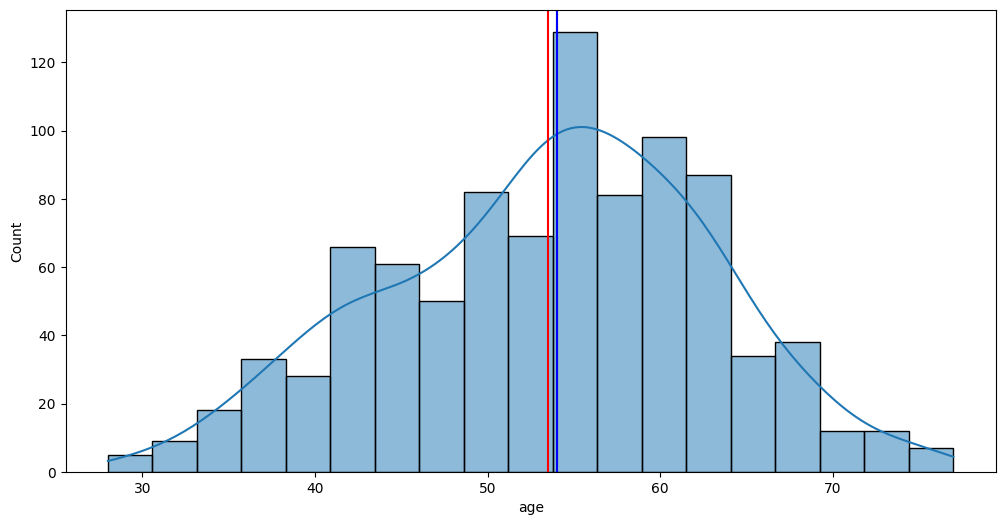

In [27]:
# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')

# print the values of mean, median & mode
print('Mean',df['age'].mean())
print('Median',df['age'].median())
print('Mode',df['age'].mode())

- ***It looks like `normally` distributed***

In [28]:
df['sex'].value_counts()

,count
sex,
Male,725
Female,194


In [29]:
print(df.groupby('sex')['age'].value_counts())

sex     age 
Female  54.0    15
        51.0    11
        62.0    10
        43.0     9
        48.0     9
                ..
Male    77.0     2
        28.0     1
        31.0     1
        33.0     1
        76.0     1
Name: count, Length: 91, dtype: int64


In [30]:
# histplot of age having color by sex

fig = px.histogram(df,x='age',title='Age Distribution',color='sex')
fig.update_layout(width=1200, height=600)
fig.show()

* ***So most of the males & females in the age of 54-55 are affected by this.***
* ***Males are affected more than females.***

### ***Explore data based on Dataset & Sex***

In [31]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [32]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,199
Switzerland,123


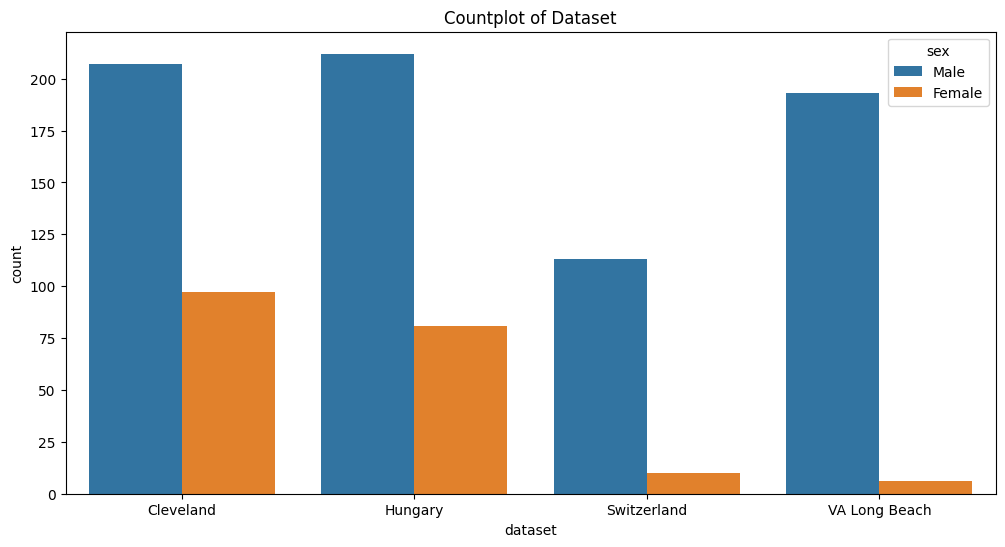

In [33]:
# countplot of dataset

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='dataset', hue='sex')
plt.title('Countplot of Dataset')
plt.show()

*   ***So, in the dataset cleveland has more patients (304)***
*   ***Switzerland has less patients (123)***
* ***Most males are from Hungary anf least from Switzerland.***
* ***Most females are from Cleveland and least from VA Long Beach	.***




## ***Machine Learning***


In [53]:
# Split data into X and y

X = df.drop(['id','num'],axis=1)
y = df['num']

In [54]:
# Categorical Columns

cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [55]:
# label encode categorical variables

le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['dataset'] = le.fit_transform(X['dataset'])
X['cp'] = le.fit_transform(X['cp'])
X['fbs'] = le.fit_transform(X['fbs'])
X['restecg'] = le.fit_transform(X['restecg'])
X['exang'] = le.fit_transform(X['exang'])
X['slope'] = le.fit_transform(X['slope'])
X['thal'] = le.fit_transform(X['thal'])



In [56]:
# Train Test the data

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [57]:
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 735, Test set size: 184


In [58]:
# call the model
model = LogisticRegression()


In [59]:
# fit the model
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
# predict the model
y_pred = model.predict(X_test)

In [61]:
  # print the performing metric
print('Accuracy Score: ', accuracy_score(y_test, y_pred))



Accuracy Score:  0.5380434782608695


- ***So, the Accuracy Score is `0.53` which is not good***

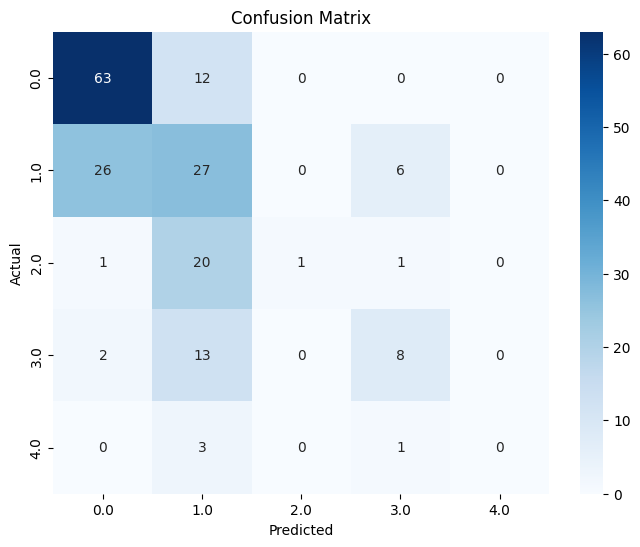

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.84      0.75        75
         1.0       0.36      0.46      0.40        59
         2.0       1.00      0.04      0.08        23
         3.0       0.50      0.35      0.41        23
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.51      0.34      0.33       184
weighted avg       0.58      0.54      0.50       184



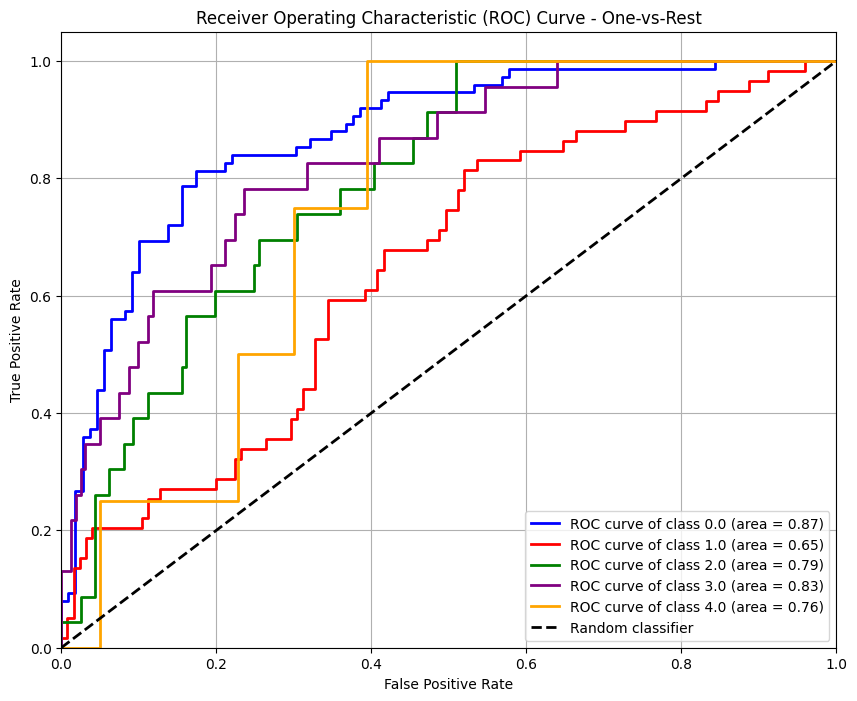

In [64]:
# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Binarize the true labels for a one-vs-rest approach
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange'] # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

It provide a `visual representation` of your model's performance across different classification thresholds for each class, using a one-vs-rest approach.
- Each `colored` line represents the `ROC curve` for a specific class (0, 1, 2, 3, 4) against all other classes. The closer the curve is to the top-left corner, the better the model is at distinguishing that class from the others.
The dashed black line represents a random classifier, which has an AUC of `0.5`. A good model should have its ROC curve significantly above this line.
The `Area Under the Curve (AUC)` for each class is:

- `Class 0` (No Disease): AUC =` 0.87 `- This indicates a reasonably good ability to distinguish patients without heart disease from those with heart disease.
- `Class 1`: AUC = `0.65` - The model's ability to distinguish this class is moderate.
- `Class 2`: AUC = `0.79 `- Similar to class 1, with moderate performance.
- `Class 3`: AUC = `0.83` - This class is also reasonably well distinguished by the model.
- `Class 4`: AUC =` 0.76` - Similar to class 0, the model performs quite well in distinguishing this class.

In [65]:
# Combine the dataframes
y_reset = y.reset_index(drop=True)
df_combined = pd.concat([X, y_reset], axis=1)
correlation_matrix = df_combined.corr()
print(correlation_matrix)

               age       sex   dataset        cp  trestbps      chol  \
age       1.000000  0.056809  0.235122 -0.076807  0.263737 -0.091161   
sex       0.056809  1.000000  0.285276 -0.126779  0.012978 -0.197176   
dataset   0.235122  0.285276  1.000000 -0.152832  0.056655 -0.417227   
cp       -0.076807 -0.126779 -0.152832  1.000000 -0.009150  0.069443   
trestbps  0.263737  0.012978  0.056655 -0.009150  1.000000  0.088368   
chol     -0.091161 -0.197176 -0.417227  0.069443  0.088368  1.000000   
fbs       0.220011  0.075624  0.171065  0.006959  0.162780  0.085335   
restecg  -0.006654  0.072162  0.460772 -0.070233  0.025368 -0.197574   
thalch   -0.388328 -0.197068 -0.447964  0.272929 -0.114396  0.229123   
exang     0.216534  0.193002  0.249648 -0.344850  0.155948 -0.022788   
oldpeak   0.263907  0.108663  0.063118 -0.175981  0.176957  0.052663   
slope    -0.266630 -0.173608 -0.304612  0.183204 -0.077429  0.073374   
ca        0.582299  0.185852  0.312953 -0.212234  0.121111 -0.13

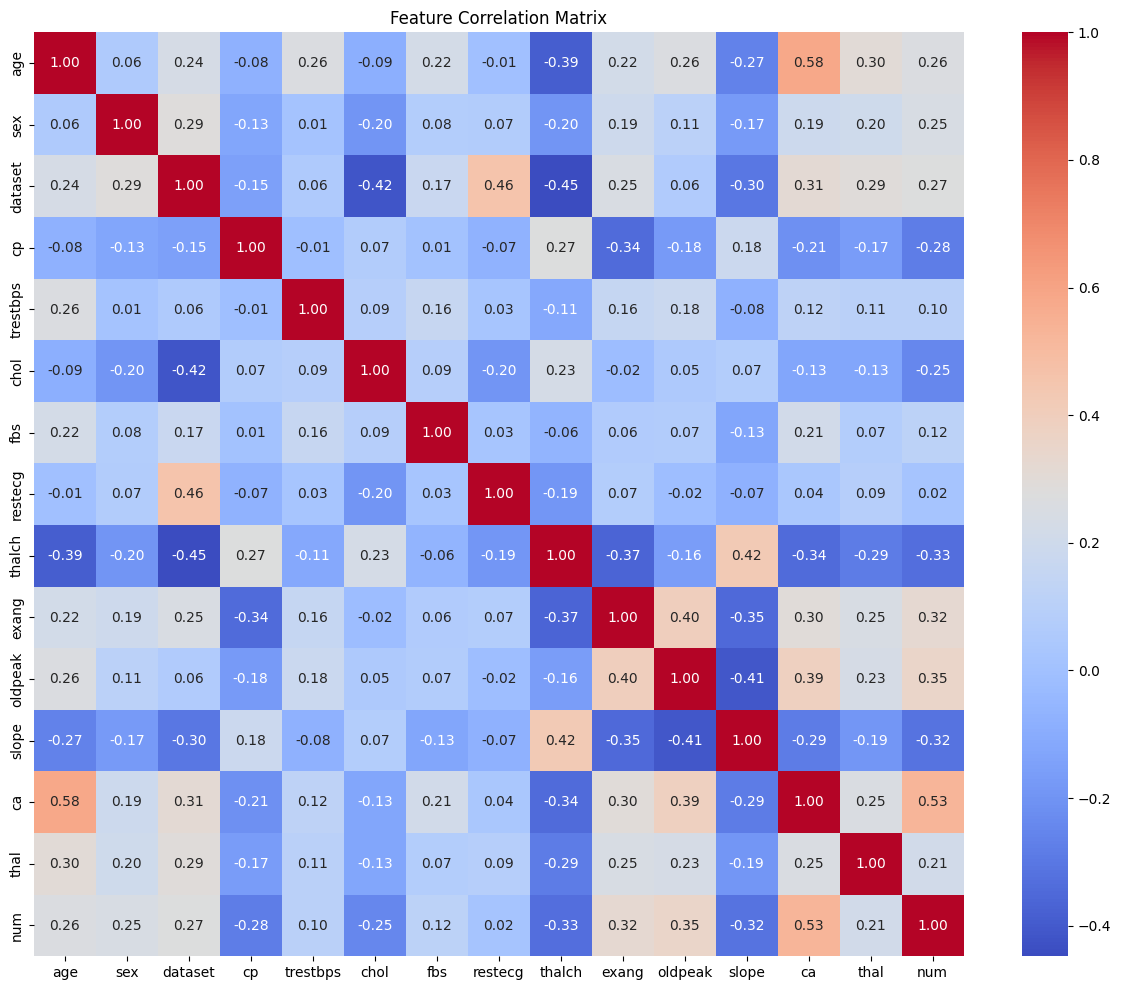

In [66]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()